Description:
The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

Variables:
Hours Studied: The total number of hours spent studying by each student.
Previous Scores: The scores obtained by students in previous tests.
Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).
Sleep Hours: The average number of hours of sleep the student had per day.
Sample Question Papers Practiced: The number of sample question papers the student practiced.




In [1]:
import pandas as pd

url = "https://drive.google.com/uc?id=1JcM6GSKUjtIBWsqdbrWhlzHTGOwBjrRM"
df = pd.read_csv(url)

df.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df.head()
# Importing first 5 rows

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.tail()
# Importing last 5 rows

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [5]:
df.isnull().sum()
# checking the null values in the dataset

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [6]:
df.info()
# checking the datatype of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [7]:
df.shape
# checking the shape of the dataset

(10000, 6)

In [8]:
df.describe()
# Applying describe on numerical values to find count, mean, std, min, 25%, 50%

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [9]:
df["Hours Studied"].value_counts()
# checking number of values occuring in Hour Studied column

Hours Studied
1    1152
6    1133
7    1129
3    1119
9    1115
5    1094
8    1088
4    1085
2    1085
Name: count, dtype: int64

In [10]:
df["Extracurricular Activities"].value_counts()
# checking number of values occuring in Extracurricular Activities column

Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64

In [11]:
df["Extracurricular Activities"].unique()

# checking unique values within Extracurricular Activities column

array(['Yes', 'No'], dtype=object)

In [12]:
df["Extracurricular Activities"] = df["Extracurricular Activities"].str.strip().str.lower().map({"yes": 1, "no": 0})

# applying mapping on Extracurricular Activities since it has two values yes and no and giving tes = 1, no = 0

In [13]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


<Axes: ylabel='Hours Studied'>

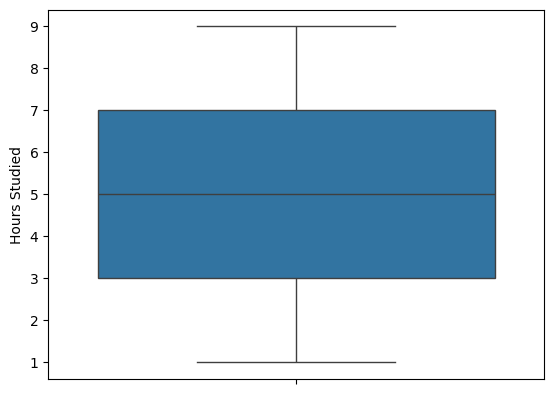

In [14]:
sns.boxplot(df["Hours Studied"])

<Axes: ylabel='Previous Scores'>

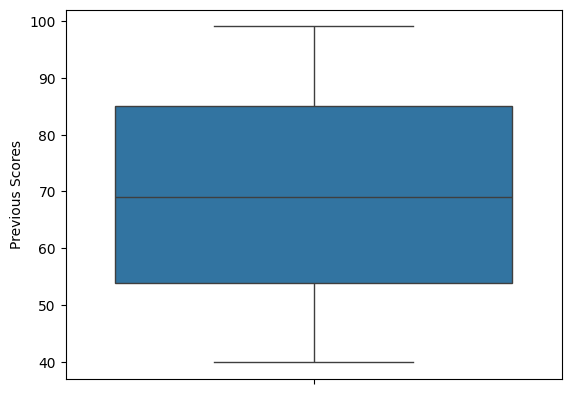

In [15]:
sns.boxplot(df["Previous Scores"])

<Axes: ylabel='Extracurricular Activities'>

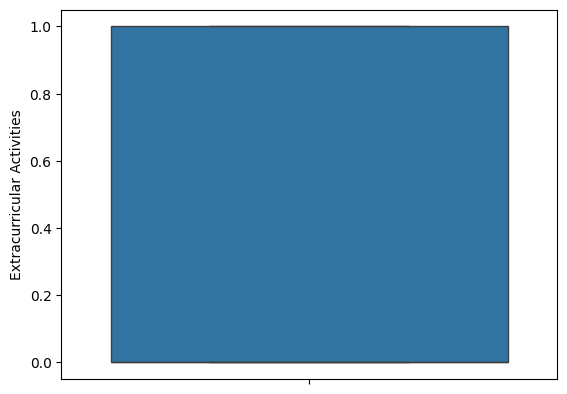

In [16]:
sns.boxplot(df["Extracurricular Activities"])

<Axes: ylabel='Sleep Hours'>

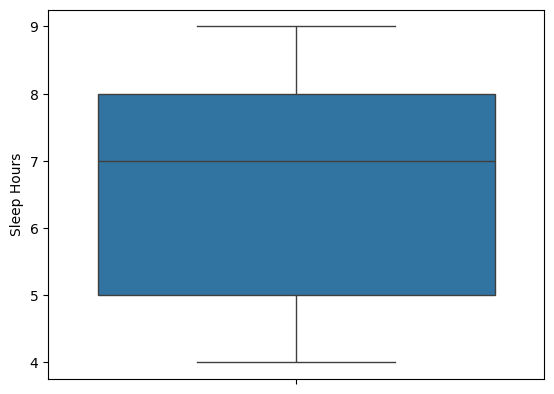

In [17]:
sns.boxplot(df["Sleep Hours"])

<Axes: ylabel='Sample Question Papers Practiced'>

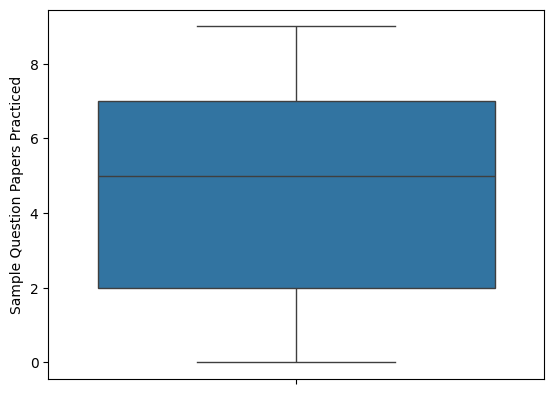

In [18]:
sns.boxplot(df["Sample Question Papers Practiced"])

<Axes: ylabel='Performance Index'>

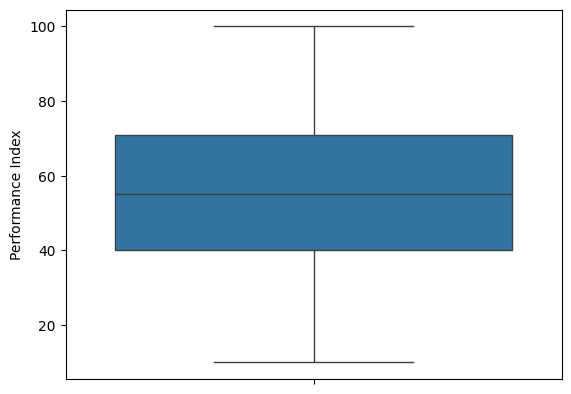

In [19]:
sns.boxplot(df["Performance Index"])

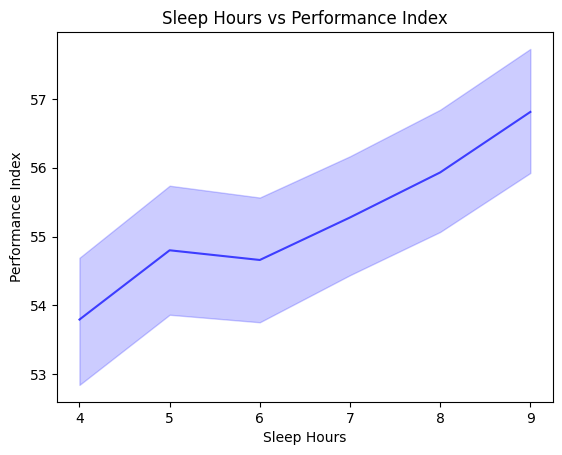

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x=df["Sleep Hours"], y=df["Performance Index"], color='blue', alpha=0.7)
plt.title("Sleep Hours vs Performance Index")
plt.xlabel("Sleep Hours")
plt.ylabel("Performance Index")
plt.show()

#This code creates a blue line graph that shows the relationship between the number of Sleep Hours someone gets and their Performance Index.
#The graph is easy to read and helps you visually understand whether getting more sleep leads to better performance.




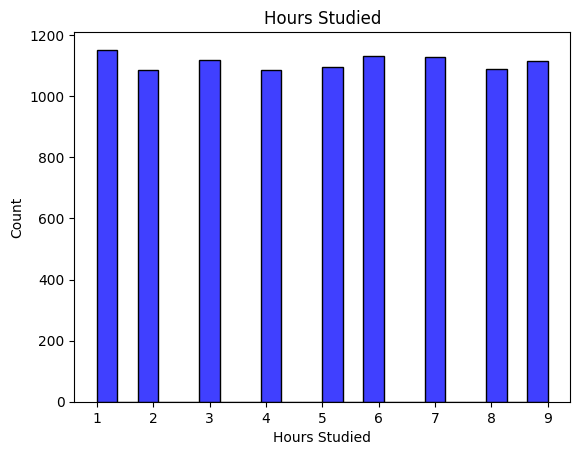

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(x=df['Hours Studied'], color='blue')
plt.title('Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Count')
plt.show()

# This graph will display the distribution of "Hours Studied," showing how many people fall into specific ranges of hours.
# The KDE curve will provide a smooth approximation of the data's probability density.

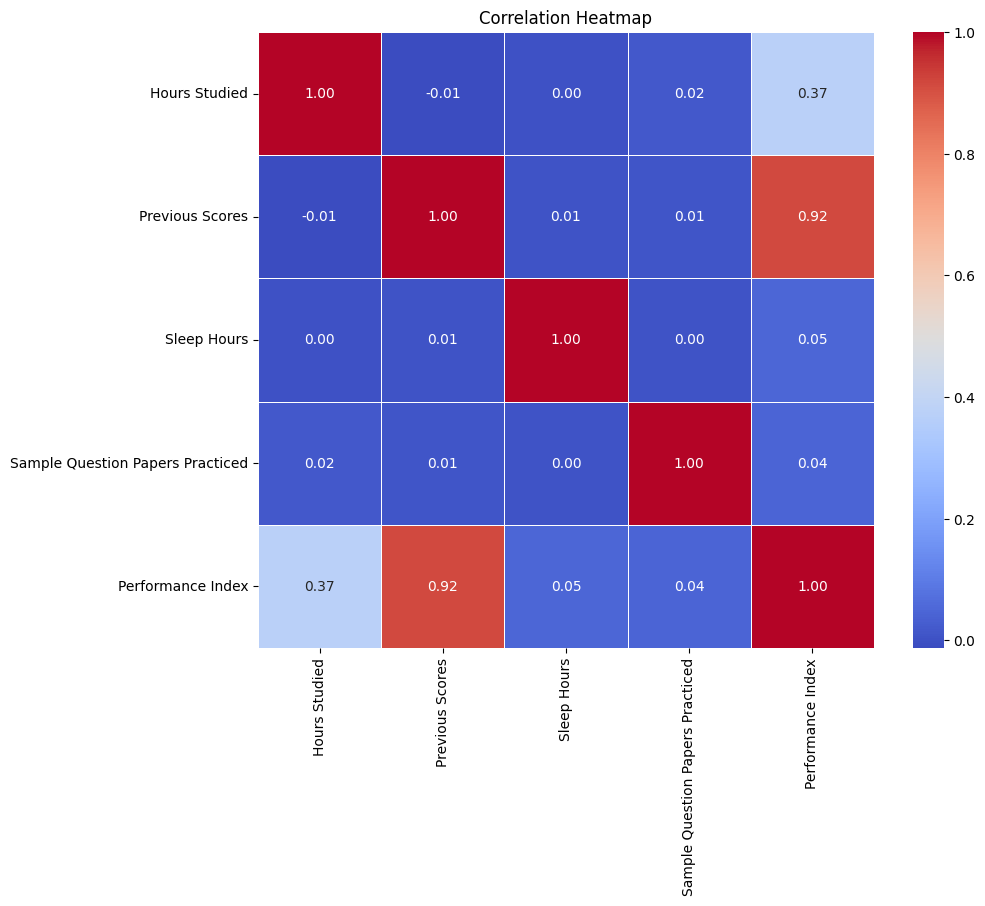

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://drive.google.com/uc?id=1JcM6GSKUjtIBWsqdbrWhlzHTGOwBjrRM"
df = pd.read_csv(url)

df_numerical = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = df_numerical.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', square=True)
plt.title("Correlation Heatmap")
plt.show()

 # Using heatmap will tell us correlations amongst numerical values for example we can see below that there is
 # strong relationship between Performance Index and Previous Scores.


In [23]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ["Performance Index"])
y = df["Performance Index"]

# X represents all the information you have (like hours studied, sleep hours, etc.) that you want to use to predict something.
# y is the specific thing you're trying to predict, which is the Performance Index in this case (could be a score or performance measure).

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = 66)

# Training the model is like teaching the model with some examples (80% of the data).
# Testing the model is like testing how well it has learned by giving it new examples (the remaining 20% of the data it hasn’t seen yet).


# Print the shapes of the datasets
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (8000, 5)
X_test: (2000, 5)
y_train: (8000,)
y_test: (2000,)


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error ,  r2_score

In [26]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [28]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [29]:
# Using Linear Regression

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Yes'

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test , y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

In [ ]:
#  Using Ridge , Lasso , Elastic Net

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [ ]:
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
elastic_net.fit(X_train, y_train)

In [ ]:
ridge_pred = ridge.predict(X_test)
lasso_pred = lasso.predict(X_test)
elastic_net_pred = elastic_net.predict(X_test)

In [ ]:
ridge_mse = mean_squared_error(y_test, ridge_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
elastic_net_mse = mean_squared_error(y_test, elastic_net_pred)

In [ ]:
ridge_mae = mean_absolute_error(y_test, ridge_pred)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
elastic_net_mae = mean_absolute_error(y_test, elastic_net_pred)

In [ ]:
ridge_r2 = r2_score(y_test, ridge_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
elastic_net_r2 = r2_score(y_test, elastic_net_pred)

In [ ]:
print("Ridge Regression:")
print("  MSE:", ridge_mse)
print("  MAE:", ridge_mae)
print("  R2_score:", ridge_r2)



In [ ]:
print("\nLasso Regression:")
print("  MSE:", lasso_mse)
print("  MAE:", lasso_mae)
print("  R2_score:", lasso_r2)

In [ ]:
print("\nElastic Net Regression:")
print("  MSE:", elastic_net_mse)
print("  MAE:", elastic_net_mae)
print("  R2_score:", elastic_net_r2)

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
param_grid_ridge = {"alpha": [0.01, 0.1, 1, 10, 100]}
param_grid_lasso = {"alpha": [0.01, 0.1, 1, 10, 100]}
param_grid_elastic_net = {"alpha": [0.01, 0.1, 1, 10, 100], "l1_ratio": [0.2, 0.5, 0.8]}

In [ ]:
ridge = Ridge()
grid_ridge_mse = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, cv=5, scoring="neg_mean_squared_error")
grid_ridge_mse.fit(X_train, y_train)

In [ ]:
lasso = Lasso()
grid_lasso_mse = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso, cv=5, scoring="neg_mean_squared_error")
grid_lasso_mse.fit(X_train, y_train)


In [ ]:
elastic_net = ElasticNet()
grid_elastic_net_mse = GridSearchCV(estimator=elastic_net, param_grid=param_grid_elastic_net, cv=5, scoring="neg_mean_squared_error")
grid_elastic_net_mse.fit(X_train, y_train)

In [ ]:
grid_ridge_mae = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, cv=5, scoring="neg_mean_absolute_error")
grid_ridge_mae.fit(X_train, y_train)


In [ ]:
grid_lasso_mae = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso, cv=5, scoring="neg_mean_absolute_error")
grid_lasso_mae.fit(X_train, y_train)

In [ ]:
grid_elastic_net_mae = GridSearchCV(estimator=elastic_net, param_grid=param_grid_elastic_net, cv=5, scoring="neg_mean_absolute_error")
grid_elastic_net_mae.fit(X_train, y_train)

In [ ]:
# Displaying the best hyperparameters and the corresponding MSE for Ridge regression
print("Best Ridge Parameters:", grid_ridge_mse.best_params_)
print("Best Ridge MSE:", -grid_ridge_mse.best_score_)

# Displaying the best hyperparameters and the corresponding MSE for Lasso regression
print("Best Lasso Parameters:", grid_lasso_mse.best_params_)
print("Best Lasso MSE:", -grid_lasso_mse.best_score_)

# Displaying the best hyperparameters and the corresponding MSE for ElasticNet regression
print("Best Elastic Net Parameters:", grid_elastic_net_mse.best_params_)
print("Best Elastic Net MSE:", -grid_elastic_net_mse.best_score_)


In [ ]:
# Displaying the best hyperparameters and the corresponding MAE for Ridge regression
print("Best Ridge Parameters:", grid_ridge_mae.best_params_)
print("Best Ridge MAE:", -grid_ridge_mae.best_score_)

# Displaying the best hyperparameters and the corresponding MAE for Lasso regression
print("Best Lasso Parameters:", grid_lasso_mae.best_params_)
print("Best Lasso MAE:", -grid_lasso_mae.best_score_)

# Displaying the best hyperparameters and the corresponding MAE for ElasticNet regression
print("Best Elastic Net Parameters:", grid_elastic_net_mae.best_params_)
print("Best Elastic Net MAE:", -grid_elastic_net_mae.best_score_)


In [ ]:
# Extracting the best estimators for Ridge, Lasso, and ElasticNet from the MSE-based grid search results
best_ridge_mse = grid_ridge_mse.best_estimator_
best_lasso_mse = grid_lasso_mse.best_estimator_
best_elastic_net_mse = grid_elastic_net_mse.best_estimator_

# Making predictions on the test set using the best models based on MSE
ridge_pred_mse = best_ridge_mse.predict(X_test)
lasso_pred_mse = best_lasso_mse.predict(X_test)
elastic_net_pred_mse = best_elastic_net_mse.predict(X_test)

# Extracting the best estimators for Ridge, Lasso, and ElasticNet from the MAE-based grid search results
best_ridge_mae = grid_ridge_mae.best_estimator_
best_lasso_mae = grid_lasso_mae.best_estimator_
best_elastic_net_mae = grid_elastic_net_mae.best_estimator_

# Making predictions on the test set using the best models based on MAE
ridge_pred_mae = best_ridge_mae.predict(X_test)
lasso_pred_mae = best_lasso_mae.predict(X_test)
elastic_net_pred_mae = best_elastic_net_mae.predict(X_test)



In [ ]:
print("\nRidge Test MSE:", mean_squared_error(y_test, ridge_pred))
print("Lasso Test MSE:", mean_squared_error(y_test, lasso_pred))
print("Elastic Net Test MSE:", mean_squared_error(y_test, elastic_net_pred))

print("\nRidge Test MAE:", mean_absolute_error(y_test, ridge_pred))
print("Lasso Test  MAE:", mean_absolute_error(y_test, lasso_pred))
print("Elastic Net Test  MAE:", mean_absolute_error(y_test, elastic_net_pred))


print("\nRidge Test R2_score:", r2_score(y_test, ridge_pred))
print("Lasso Test R2_score:", r2_score(y_test, lasso_pred))
print("Elastic Net Test R2_score:", r2_score(y_test, elastic_net_pred))